<a href="https://colab.research.google.com/github/malikinza/KNN-Algorithm/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing dataset on diabetes
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(
    name='diabetes',
    cache=False
)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#Creating a Pandas DataFrame called diabetes_df containing the data and the targets, with the feature names as column headings
diabetes_data
df_data = diabetes_data.data
df_target = diabetes_data.target
df_featurenames = diabetes_data.feature_names
diabetes_df = pd.DataFrame (df_data, columns = df_featurenames)
diabetes_df['target']=df_target
print('Average age of participants:',round(diabetes_df['age'].mean()))
target2list = diabetes_df['target'].tolist()
pos = target2list.count('tested_positive')
print('Tested Positive:',pos)
neg = target2list.count('tested_negative')
print('Tested Negative:',neg)


Average age of participants: 33
Tested Positive: 268
Tested Negative: 500


In [ ]:
#Converting string labels into integers using the label encoder class from Scikit-Learn.
#Representing whether a patient has diabetes using 1 or 0 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['tested_positive','tested_negative'])
df_target_new = le.transform(df_target)
diabetes_df['target'] = df_target_new
print(diabetes_df)


     preg   plas  pres  skin   insu  mass   pedi   age  target
0     6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0       1
1     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0       0
2     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0       1
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0       0
4     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0       1
..    ...    ...   ...   ...    ...   ...    ...   ...     ...
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0       0
764   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0       0
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0       0
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0       1
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0       0

[768 rows x 9 columns]


Mean Cross Validation Accuracy: 70.31
Test Accuracy: 83.12
Better k: 17
Better performance: 79.22


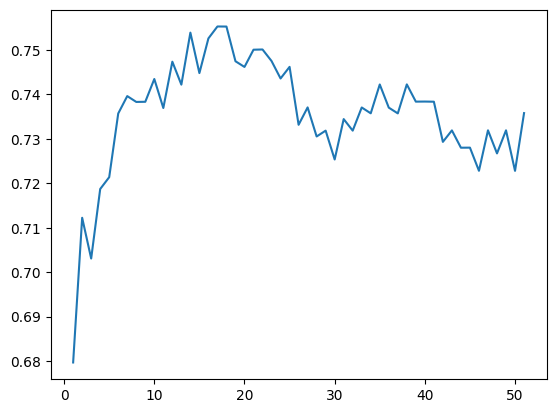

In [ ]:
#Split the data into a 70:30 train-test ratio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
X = df_data
y = df_target_new
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

#measuring the model quality using the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
score = cross_val_score (knn, X, y, cv=10)
mean_accuracy = score.mean()*100
print('Mean Cross Validation Accuracy: %0.2f'% mean_accuracy)

y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: %0.2f' %test_accuracy)

#Improving the performance of the model 
accuracy_list=list()
highest_accuracy = 0
i=0
while i <=50:
  i=i+1
  knn1=neighbors.KNeighborsClassifier(n_neighbors=i)
  knn1.fit(X,y)
  score1 =cross_val_score(knn1,X,y,cv=10)
  mean_accuracy1 = score1.mean()
  accuracy_list.append(mean_accuracy1)
  if mean_accuracy1 > highest_accuracy:
    k=i
    highest_accuracy = mean_accuracy1
  else:
    k=k
print ('Better k:', k)

knn2 = neighbors.KNeighborsClassifier(n_neighbors=17)
knn2.fit(X,y)
y_pred2 = knn2.predict(X_test)
test_accuracy1 = accuracy_score(y_test, y_pred2)*100
print ('Better performance: %0.2f'%test_accuracy1)

krange=range(1,52)
plt.plot(krange,accuracy_list)


In [ ]:
#Using the SimpleImputer class from scikit-learn to impute missing values for the skin and insu columns 
diabetes_df.describe()
description = diabetes_data['DESCR']
#print(description)

diabetes_df1 = diabetes_df.copy()

#impute mean values
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=0.0, strategy='mean')
skin_imp = diabetes_df1['skin'].values.reshape(-1,1)
imp.fit (skin_imp)
skin_imp1 = imp.transform(skin_imp)
diabetes_df1['skin'] = skin_imp1

insu_imp = diabetes_df1['insu'].values.reshape(-1,1)
imp.fit(insu_imp)
insu_imp1 = imp.transform(insu_imp)
diabetes_df1['insu'] = insu_imp1

print(diabetes_df1)


     preg   plas  pres      skin        insu  mass   pedi   age  target
0     6.0  148.0  72.0  35.00000  155.548223  33.6  0.627  50.0       1
1     1.0   85.0  66.0  29.00000  155.548223  26.6  0.351  31.0       0
2     8.0  183.0  64.0  29.15342  155.548223  23.3  0.672  32.0       1
3     1.0   89.0  66.0  23.00000   94.000000  28.1  0.167  21.0       0
4     0.0  137.0  40.0  35.00000  168.000000  43.1  2.288  33.0       1
..    ...    ...   ...       ...         ...   ...    ...   ...     ...
763  10.0  101.0  76.0  48.00000  180.000000  32.9  0.171  63.0       0
764   2.0  122.0  70.0  27.00000  155.548223  36.8  0.340  27.0       0
765   5.0  121.0  72.0  23.00000  112.000000  26.2  0.245  30.0       0
766   1.0  126.0  60.0  29.15342  155.548223  30.1  0.349  47.0       1
767   1.0   93.0  70.0  31.00000  155.548223  30.4  0.315  23.0       0

[768 rows x 9 columns]


Better k: 18
Better performance: 70.56


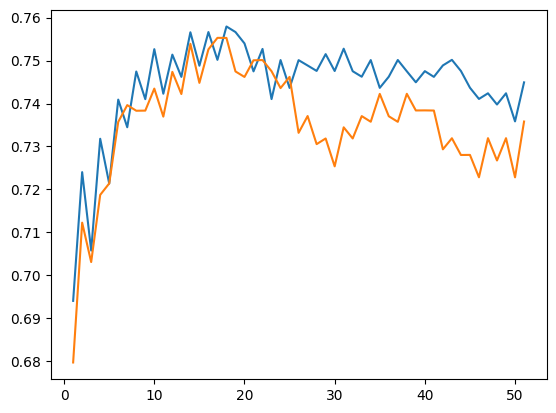

In [ ]:
#Re-splitting the data and evaluting performance after the mean imputation
from sklearn.model_selection import train_test_split
X_new = diabetes_df1.drop(columns = ['target'])
y_new = df_target_new
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 0)
from sklearn.model_selection import cross_val_score

accuracy_list_new=list()
highest_accuracy_new = 0
i=0
while i <=50:
  i=i+1
  knn1_new=neighbors.KNeighborsClassifier(n_neighbors=i)
  knn1_new.fit(X,y)
  score1_new =cross_val_score(knn1_new,X_new,y_new,cv=10)
  mean_accuracy1_new = score1_new.mean()
  accuracy_list_new.append(mean_accuracy1_new)
  if mean_accuracy1_new > highest_accuracy_new:
    k=i
    highest_accuracy_new = mean_accuracy1_new
  else:
    k=k
print ('Better k:', k)

knn2_new = neighbors.KNeighborsClassifier(n_neighbors=18)
knn2_new.fit(X,y)
y_pred2_new = knn2_new.predict(X_test)
test_accuracy1 = accuracy_score(y_test, y_pred2_new)*100
print ('Better performance: %0.2f'%test_accuracy1)

krange=range(1,52)
plt.plot( krange,accuracy_list_new)
plt.plot(krange,accuracy_list)



With the mean imputation, K = 18 performs the best, with a test accuracy of 70.56%. With the non-imputed data, K = 17 performed the best, with a test accuracy of 79.22%. The performance is worse with the imputed values because the split is different now. 

Mean imputation can distort the distribution of the data and underestimate the variance. The plots below show the validation accuracy for k ranging from 1:50. The yellow line represents the non-imputed data and the blue represents the imputed data. As can be seen, the imputed data plot reports accuracy more consistantly and seems to plateau about 75% accuracy. Conversely, the non-imputed data shows more variance. 

References

Train, Test and Validation set:

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

